<a href="https://colab.research.google.com/github/supriyasiwakoti/Portfolio-Projects-/blob/main/Multiple_Linear_Regression_Model_Socal_Edison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Season: Indicates which season the power outage occured in.


*   Contains 4 categorical variables: Summer, Fall, Winter, Spring
*   This is column is not overfitting or underfitting because it is not too complex and is not too similar to any of the other columns included.
*   This column helps identify seasonal patterns in outages, which can help stakeholders create resource allocation and infrastructure maintenance schedules.


2. Anomoly Level: This has numerical values that indicates the degree or severity of deviation from normal or what is expected.


*   Contains numerical values to one decimal place from -1 to 1.
*   This column is not overfitting or underfitting because there are no other columns that describe this value.
*   This indicates the severity or unusualness of an outage event, allowing stakeholders to prioritize response efforts.


3. Cause Category: Breifly describes the resaon the power outage occured.


*   Contains short strings
*   This column is not overfitting or underfitting because it is not complex. The strings are short and simple, so they are consise.
*   Identifies the root cause of outages, which can guide preventive measures and infrastructure improvements.


4. Residential, Commercial, and Industry Costumers: Indicates how many residential, commercial, and industry costumers were involved in the power outage.


*   Contains integers for the total number of costumers in these respective areas
*   This is not overfitting because, although all these 3 columns are about costumers, they are each about different areas and provide different information.
*   This information will tell the stakeholders about how residential, commercial, and industry areas are involvded in power outages, based on trends.


5. Outage Start Day: Indicates which day of the week the power outage started.


*   Contains 7 categorical variables: Monday, Tuesday, Wednesday, Thursday, Friday
*   This is not overfitting or underfitting because it is not complex or related to any of the other predictors.
*   The starting day of the week of the power outages will show the stakeholders trends and help determine potenial causes.




##Loading the Dataset

In [ ]:
import pandas as pd

# Loading the dataset
file_path = '/content/Power_Outage_Clean_Data__-_S&N_Data.csv'
data = pd.read_csv(file_path)

In [ ]:
# Displaying the first few rows and a summary of the dataset
data_head = data.head()
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SEASONS           1181 non-null   object 
 1   ANOMALY.LEVEL     1177 non-null   float64
 2   CAUSE.CATEGORY    1181 non-null   object 
 3   OUTAGE.DURATION   1147 non-null   float64
 4   RES.CUSTOMERS     1181 non-null   int64  
 5   COM.CUSTOMERS     1181 non-null   int64  
 6   IND.CUSTOMERS     1181 non-null   int64  
 7   OUTAGE.START.DAY  1177 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 73.9+ KB


In [ ]:
data_head, data_info

(  SEASONS  ANOMALY.LEVEL      CAUSE.CATEGORY  OUTAGE.DURATION  RES.CUSTOMERS  \
 0  Summer           -0.3      severe weather           3060.0        2308736   
 1  Spring           -0.1  intentional attack              1.0        2345860   
 2    Fall           -1.5      severe weather           3000.0        2300291   
 3  Summer           -0.1      severe weather           2550.0        2317336   
 4  Summer            1.2      severe weather           1740.0        2374674   
 
    COM.CUSTOMERS  IND.CUSTOMERS OUTAGE.START.DAY  
 0         276286          10673           Friday  
 1         284978           9898           Sunday  
 2         276463          10150          Tuesday  
 3         278466          11010          Tuesday  
 4         289044           9812         Saturday  ,
 None)

##Data Preprocessing

In [ ]:
from scipy import stats
import numpy as np

In [ ]:
# Show how many NA values are in the dataset
data.isna().sum()

SEASONS              0
ANOMALY.LEVEL        4
CAUSE.CATEGORY       0
OUTAGE.DURATION     34
RES.CUSTOMERS        0
COM.CUSTOMERS        0
IND.CUSTOMERS        0
OUTAGE.START.DAY     4
dtype: int64

In [ ]:
# Remove NA values
data_nona = data.dropna()

In [ ]:
# Show how many NA items were removed
num_removed = data.shape[0] - data_nona.shape[0]
print("\nNumber of values removed:", num_removed)

# Show all the NA items that were removed
na_removed = data[~data.index.isin(data_nona.index)]
print("NA values that were removed:")
print(na_removed)


Number of values removed: 34
NA values that were removed:
      SEASONS  ANOMALY.LEVEL      CAUSE.CATEGORY  OUTAGE.DURATION  \
20     Summer            1.2  intentional attack              NaN   
41     Spring            1.1  intentional attack              NaN   
215    Winter            2.3      severe weather              NaN   
259   #VALUE!            NaN      severe weather              NaN   
269    Spring           -0.7      severe weather              NaN   
283   #VALUE!            NaN      severe weather              NaN   
341    Spring            1.6  intentional attack              NaN   
344    Spring            1.6      severe weather              NaN   
346    Summer            1.4      severe weather              NaN   
356      Fall            2.2      severe weather              NaN   
368    Spring            1.6  intentional attack              NaN   
369      Fall            2.2      severe weather              NaN   
410    Spring            0.2  intentional at

There were a total of 42 NA values in this dataset and they were all removed.Removing the NA values to ensures the quality and reliability of the data for analysis and modeling.

In [ ]:
# Display the data with no NULL values
data_nona

,SEASONS,ANOMALY.LEVEL,CAUSE.CATEGORY,OUTAGE.DURATION,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS,OUTAGE.START.DAY
0,Summer,-0.3,severe weather,3060.0,2308736,276286,10673,Friday
1,Spring,-0.1,intentional attack,1.0,2345860,284978,9898,Sunday
2,Fall,-1.5,severe weather,3000.0,2300291,276463,10150,Tuesday
3,Summer,-0.1,severe weather,2550.0,2317336,278466,11010,Tuesday
4,Summer,1.2,severe weather,1740.0,2374674,289044,9812,Saturday
...,...,...,...,...,...,...,...,...
1175,Fall,0.7,severe weather,1906.0,401592,61334,689,Sunday
1176,Winter,-0.9,intentional attack,0.0,667243,101424,26258,Wednesday
1177,Winter,-1.3,intentional attack,360.0,667243,101424,26258,Sunday
1178,Summer,-0.3,intentional attack,870.0,667243,101424,26258,Wednesday


This the is refined dataset with no NULL values that can be used for analysis.

Outlier Analysis

**Outage Duration**

Identify outliers in the 'OUTAGE.DURATION' column using Z-score

In [ ]:
# Calculates z-score for 'OUTAGE.DURATION' column
z_scores = stats.zscore(data_nona['OUTAGE.DURATION'])
# Calculates the aboslute value of each z-score
abs_z_scores = np.abs(z_scores)
# Find the scores that are less than 3 to remove outliers
filtered_entries = (abs_z_scores < 3)

Boxplot showing the outliers

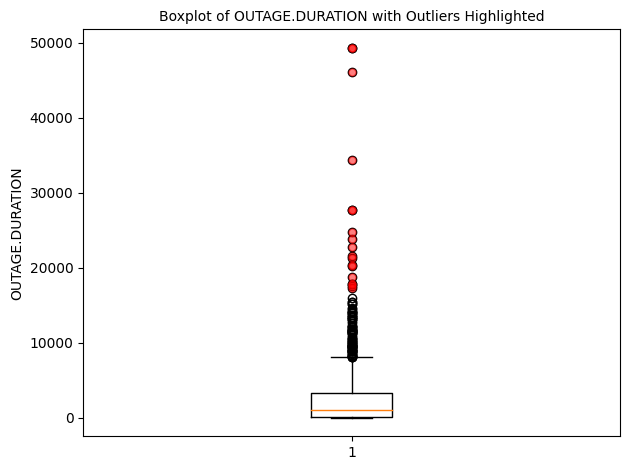

In [ ]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.boxplot(data_nona['OUTAGE.DURATION'], widths=None, patch_artist=None, notch=None, vert=None)

# Add title and labels
outliers = data_nona[~filtered_entries]['OUTAGE.DURATION']
plt.plot(np.ones_like(outliers), outliers, 'ro', markersize=5, alpha=0.5)

# Highlight outliers
plt.title('Boxplot of OUTAGE.DURATION with Outliers Highlighted', fontsize=10)
plt.ylabel('OUTAGE.DURATION', fontsize=10)

plt.tight_layout()

#Show the boxplot with outliers
plt.show()

This boxplot shows all the data and makes it clear that there are significant outliers at values past 30,000 minutes. Values like these that are so distant from the rest of the data can skew analysis, so they will be removed.

In [ ]:
data_no_outliers = data_nona[filtered_entries]
data_no_outliers.shape

(1129, 8)

There are 1129 rows and 8 columns in the dataframe with no NULL values and no outliers.

In [ ]:
# Summary of the cleaned data
summary_cleaned_data = {
    'Original Data Size': len(data),
    'After Removing NAs': len(data_nona),
    'After Removing Outliers': len(data_no_outliers)
}

summary_cleaned_data

{'Original Data Size': 1181,
 'After Removing NAs': 1147,
 'After Removing Outliers': 1129}

In the original dataset, there were 1,181 rows. After removing NULL values, there were 1,147 rows. After removing outliers from these remaining rows, we were left with 1,129 rows, which is the data we will be using for the model and analysis.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Outage Duration Boxplot after removing outliers

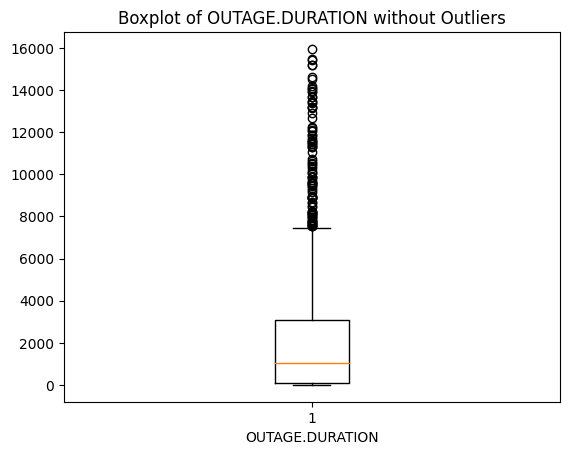

In [ ]:
# Boxplot to show the cleaned data

# Create the boxplot
plt.boxplot(data_no_outliers['OUTAGE.DURATION'], notch=None, vert=None, patch_artist=None, widths=None)


# Add title and labels
plt.title('Boxplot of OUTAGE.DURATION without Outliers')
plt.xlabel('OUTAGE.DURATION')

plt.show()

 The outliers were removed using the range found with the Z-score. This boxplot shows the remaining data. It is clear to see that this data is not skewed and can be used for analysis.

##Data Transformation

Updating categorical columns list

In [ ]:
categorical_columns = data_no_outliers[['SEASONS', 'CAUSE.CATEGORY', 'OUTAGE.START.DAY']]
categorical_columns

,SEASONS,CAUSE.CATEGORY,OUTAGE.START.DAY
0,Summer,severe weather,Friday
1,Spring,intentional attack,Sunday
2,Fall,severe weather,Tuesday
3,Summer,severe weather,Tuesday
4,Summer,severe weather,Saturday
...,...,...,...
1175,Fall,severe weather,Sunday
1176,Winter,intentional attack,Wednesday
1177,Winter,intentional attack,Sunday
1178,Summer,intentional attack,Wednesday


The SEASONS, CAUSE.CATEGORY, and OUTAGE.START.DAY columns are the categorical predictor varibles that will be used in this model.

Create dummy variables for categorical columns

In [ ]:
# Generate dummy variables
dummies = pd.get_dummies(categorical_columns[['SEASONS', 'OUTAGE.START.DAY']], drop_first=True)
dummies_cause = pd.get_dummies(categorical_columns['CAUSE.CATEGORY'], drop_first=False)  # No drop_first here
data_with_dummies = pd.concat([dummies, dummies_cause], axis=1)
data_with_dummies = data_with_dummies.astype(int)
data_with_dummies.columns

Index(['SEASONS_Spring', 'SEASONS_Summer', 'SEASONS_Winter',
       'OUTAGE.START.DAY_Monday', 'OUTAGE.START.DAY_Saturday',
       'OUTAGE.START.DAY_Sunday', 'OUTAGE.START.DAY_Thursday',
       'OUTAGE.START.DAY_Tuesday', 'OUTAGE.START.DAY_Wednesday',
       'intentional attack', 'severe weather'],
      dtype='object')

This table shows dummy varibales for every predictior.

Normalize your numerical variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Identify numerical columns (excluding target variable and assuming all others are numerical)
numerical_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns

['ANOMALY.LEVEL',
 'OUTAGE.DURATION',
 'RES.CUSTOMERS',
 'COM.CUSTOMERS',
 'IND.CUSTOMERS']

The ANOMOLY.LEVEL, RES.COSTUMERS, COM.COSTUMERS, and IND.COSTMERS columns are the numerical predictor varibles and the OUTAGE.DURATION column is the target variable that will be used in this model.



In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [ ]:
# Normalizing only the numerical (non-categorical) columns
X_scaled_numerical = scaler.fit_transform(data_no_outliers[numerical_columns])
X_scaled_numerical

array([[-0.2708712 ,  0.24606446, -0.58239978, -0.63553378, -0.45687655],
       [ 0.00790144, -0.73012716, -0.57164999, -0.61753402, -0.47882803],
       [-1.943507  ,  0.22691719, -0.58484515, -0.63516724, -0.47169026],
       ...,
       [-1.66473437, -0.61556267, -1.05771771, -0.99764544, -0.01543931],
       [-0.2708712 , -0.45281088, -1.05771771, -0.99764544, -0.01543931],
       [ 2.37746883, -0.73044628, -1.04407286, -0.98495739,  0.02956831]])

The values within the numerical columns are normalized. This puts all the values on one scale so that they can be directly compared to one another, regardless of differing units and scales. This also removes bias and presents the data in a way that can be properly interpreted.

In [ ]:
# Creating a DataFrame for the scaled numerical features
X_scaled_numerical_df = pd.DataFrame(X_scaled_numerical, columns=numerical_columns)
X_scaled_numerical_df

,ANOMALY.LEVEL,OUTAGE.DURATION,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS
0,-0.270871,0.246064,-0.582400,-0.635534,-0.456877
1,0.007901,-0.730127,-0.571650,-0.617534,-0.478828
2,-1.943507,0.226917,-0.584845,-0.635167,-0.471690
3,0.007901,0.083313,-0.579910,-0.631019,-0.447331
4,1.819924,-0.175175,-0.563306,-0.609114,-0.481264
...,...,...,...,...,...
1124,1.122992,-0.122201,-1.134641,-1.080666,-0.739668
1125,-1.107189,-0.730446,-1.057718,-0.997645,-0.015439
1126,-1.664734,-0.615563,-1.057718,-0.997645,-0.015439
1127,-0.270871,-0.452811,-1.057718,-0.997645,-0.015439


This table shows the normalized numerical data.

Reset the indexes for both predictor data frames.


In [ ]:
# Reset index for data_with_dummies
data_with_dummies_reset = data_with_dummies.reset_index(drop=True)
data_with_dummies_reset

,SEASONS_Spring,SEASONS_Summer,SEASONS_Winter,OUTAGE.START.DAY_Monday,OUTAGE.START.DAY_Saturday,OUTAGE.START.DAY_Sunday,OUTAGE.START.DAY_Thursday,OUTAGE.START.DAY_Tuesday,OUTAGE.START.DAY_Wednesday,intentional attack,severe weather
0,0,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1124,0,0,0,0,0,1,0,0,0,0,1
1125,0,0,1,0,0,0,0,0,1,1,0
1126,0,0,1,0,0,1,0,0,0,1,0
1127,0,1,0,0,0,0,0,0,1,1,0


In [ ]:
# Reset index for X_scaled_numerical_df
X_scaled_numerical_df_reset = X_scaled_numerical_df.reset_index(drop=True)
X_scaled_numerical_df_reset

,ANOMALY.LEVEL,OUTAGE.DURATION,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS
0,-0.270871,0.246064,-0.582400,-0.635534,-0.456877
1,0.007901,-0.730127,-0.571650,-0.617534,-0.478828
2,-1.943507,0.226917,-0.584845,-0.635167,-0.471690
3,0.007901,0.083313,-0.579910,-0.631019,-0.447331
4,1.819924,-0.175175,-0.563306,-0.609114,-0.481264
...,...,...,...,...,...
1124,1.122992,-0.122201,-1.134641,-1.080666,-0.739668
1125,-1.107189,-0.730446,-1.057718,-0.997645,-0.015439
1126,-1.664734,-0.615563,-1.057718,-0.997645,-0.015439
1127,-0.270871,-0.452811,-1.057718,-0.997645,-0.015439


In [ ]:
# Combine both normalized numerical df and dummy df
combined_df = pd.concat([data_with_dummies_reset, X_scaled_numerical_df_reset], axis=1)
combined_df


,SEASONS_Spring,SEASONS_Summer,SEASONS_Winter,OUTAGE.START.DAY_Monday,OUTAGE.START.DAY_Saturday,OUTAGE.START.DAY_Sunday,OUTAGE.START.DAY_Thursday,OUTAGE.START.DAY_Tuesday,OUTAGE.START.DAY_Wednesday,intentional attack,severe weather,ANOMALY.LEVEL,OUTAGE.DURATION,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS
0,0,1,0,0,0,0,0,0,0,0,1,-0.270871,0.246064,-0.582400,-0.635534,-0.456877
1,1,0,0,0,0,1,0,0,0,1,0,0.007901,-0.730127,-0.571650,-0.617534,-0.478828
2,0,0,0,0,0,0,0,1,0,0,1,-1.943507,0.226917,-0.584845,-0.635167,-0.471690
3,0,1,0,0,0,0,0,1,0,0,1,0.007901,0.083313,-0.579910,-0.631019,-0.447331
4,0,1,0,0,1,0,0,0,0,0,1,1.819924,-0.175175,-0.563306,-0.609114,-0.481264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0,0,0,0,0,1,0,0,0,0,1,1.122992,-0.122201,-1.134641,-1.080666,-0.739668
1125,0,0,1,0,0,0,0,0,1,1,0,-1.107189,-0.730446,-1.057718,-0.997645,-0.015439
1126,0,0,1,0,0,1,0,0,0,1,0,-1.664734,-0.615563,-1.057718,-0.997645,-0.015439
1127,0,1,0,0,0,0,0,0,1,1,0,-0.270871,-0.452811,-1.057718,-0.997645,-0.015439


The categorical varibles that were transformed into dummy variables and the numerical varibles that were normaized are combined into the same data frame that will be used for analysis.

In [ ]:
# Separating the dataset into X (features) and y (target variable)
X = combined_df.drop(columns = ['OUTAGE.DURATION'])
# Display the first few rows of the final DataFrame to ensure processing
X.head()

,SEASONS_Spring,SEASONS_Summer,SEASONS_Winter,OUTAGE.START.DAY_Monday,OUTAGE.START.DAY_Saturday,OUTAGE.START.DAY_Sunday,OUTAGE.START.DAY_Thursday,OUTAGE.START.DAY_Tuesday,OUTAGE.START.DAY_Wednesday,intentional attack,severe weather,ANOMALY.LEVEL,RES.CUSTOMERS,COM.CUSTOMERS,IND.CUSTOMERS
0,0,1,0,0,0,0,0,0,0,0,1,-0.270871,-0.582400,-0.635534,-0.456877
1,1,0,0,0,0,1,0,0,0,1,0,0.007901,-0.571650,-0.617534,-0.478828
2,0,0,0,0,0,0,0,1,0,0,1,-1.943507,-0.584845,-0.635167,-0.471690
3,0,1,0,0,0,0,0,1,0,0,1,0.007901,-0.579910,-0.631019,-0.447331
4,0,1,0,0,1,0,0,0,0,0,1,1.819924,-0.563306,-0.609114,-0.481264


'X' contains all the dummy predictor varibles without the outage duration column (target varible).

In [ ]:
# Show y
y = combined_df['OUTAGE.DURATION']
y

0       0.246064
1      -0.730127
2       0.226917
3       0.083313
4      -0.175175
          ...   
1124   -0.122201
1125   -0.730446
1126   -0.615563
1127   -0.452811
1128   -0.730446
Name: OUTAGE.DURATION, Length: 1129, dtype: float64

'y' contains the normalized outage duration data.

##Train and Test Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Splitting the dataset into training and validation sets
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=42)

This dataset is split into a training set and a validation set so that the model and be trained (on the training set) and evaluated (on the vaidation set). In this case, 60% of the data will be used for training and 40% will be used for validation.

In [ ]:
# Linear Regression Model is created and saved to 'model'
model = LinearRegression()

# Training the model
model.fit(train_X, train_y)


LinearRegression()

A linear regression model is created to model the realtionship between the OUTAGE.DURATION and the predictor varibles. This model is trained with the training set created previously, where the model captures patterns and relationships.



In [ ]:
# Making predictions on the training and validation sets
train_predictions = model.predict(train_X)
valid_predictions = model.predict(valid_X)

After the training is complete, it is used to make predictions on the training and validation sets.


*   For the training set, the predictions are used to assess how well the model fits the data it was trained on
*   For the validation set, this is used to see the models performace on predicting data.



In [ ]:
# Prints the term of the model
print('intercept ',model.intercept_)

# Prints dataframe showing the predictors and their corresponding coefficients
print(pd.DataFrame({'Predictor': train_X.columns, 'coefficient': model.coef_}))

intercept  0.03348605529894231
                     Predictor  coefficient
0               SEASONS_Spring    -0.143005
1               SEASONS_Summer    -0.219998
2               SEASONS_Winter     0.004614
3      OUTAGE.START.DAY_Monday    -0.094582
4    OUTAGE.START.DAY_Saturday     0.091468
5      OUTAGE.START.DAY_Sunday     0.040254
6    OUTAGE.START.DAY_Thursday    -0.037364
7     OUTAGE.START.DAY_Tuesday    -0.222114
8   OUTAGE.START.DAY_Wednesday    -0.145994
9           intentional attack    -0.461549
10              severe weather     0.461549
11               ANOMALY.LEVEL     0.020595
12               RES.CUSTOMERS     0.161016
13               COM.CUSTOMERS    -0.091990
14               IND.CUSTOMERS    -0.081634


This data frame contains coefficients for the predictor variables and will be used for visualizations.

##Visualize Coefficients

Creating a model that shows the coefficients for each predictor

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

data = {
    'Predictor': [
        'Intercept', 'SEASONS_Spring', 'SEASONS_Summer', 'SEASONS_Winter',
        'OUTAGE.START.DAY_Monday', 'OUTAGE.START.DAY_Saturday', 'OUTAGE.START.DAY_Sunday',
        'OUTAGE.START.DAY_Thursday', 'OUTAGE.START.DAY_Tuesday', 'OUTAGE.START.DAY_Wednesday',
        'intentional attack', 'severe weather', 'ANOMALY.LEVEL', 'RES.CUSTOMERS',
        'COM.CUSTOMERS', 'IND.CUSTOMERS'
    ],
    'Coefficient': [
        0.03348605529894231, -0.143005, -0.219998, 0.004614, -0.094582, 0.091468,
        0.040254, -0.037364, -0.222114, -0.145994, -0.461549, 0.461549,
        0.020595, 0.161016, -0.091990, -0.081634
    ]
}

# Create the pandas DataFrame
data = pd.DataFrame(data)

data

,Predictor,Coefficient
0,Intercept,0.033486
1,SEASONS_Spring,-0.143005
2,SEASONS_Summer,-0.219998
3,SEASONS_Winter,0.004614
4,OUTAGE.START.DAY_Monday,-0.094582
5,OUTAGE.START.DAY_Saturday,0.091468
6,OUTAGE.START.DAY_Sunday,0.040254
7,OUTAGE.START.DAY_Thursday,-0.037364
8,OUTAGE.START.DAY_Tuesday,-0.222114
9,OUTAGE.START.DAY_Wednesday,-0.145994


In [ ]:
# Create data frame that holds the data and the correspoding coefficients
cf = pd.DataFrame(data)
cf

,Predictor,Coefficient
0,Intercept,0.033486
1,SEASONS_Spring,-0.143005
2,SEASONS_Summer,-0.219998
3,SEASONS_Winter,0.004614
4,OUTAGE.START.DAY_Monday,-0.094582
5,OUTAGE.START.DAY_Saturday,0.091468
6,OUTAGE.START.DAY_Sunday,0.040254
7,OUTAGE.START.DAY_Thursday,-0.037364
8,OUTAGE.START.DAY_Tuesday,-0.222114
9,OUTAGE.START.DAY_Wednesday,-0.145994


In [ ]:
# Sorting the DataFrame by coefficients in descending order for visual clarity
cf_sorted = cf.sort_values(by='Coefficient', ascending=False)
cf_sorted

,Predictor,Coefficient
11,severe weather,0.461549
13,RES.CUSTOMERS,0.161016
5,OUTAGE.START.DAY_Saturday,0.091468
6,OUTAGE.START.DAY_Sunday,0.040254
0,Intercept,0.033486
12,ANOMALY.LEVEL,0.020595
3,SEASONS_Winter,0.004614
7,OUTAGE.START.DAY_Thursday,-0.037364
15,IND.CUSTOMERS,-0.081634
14,COM.CUSTOMERS,-0.091990


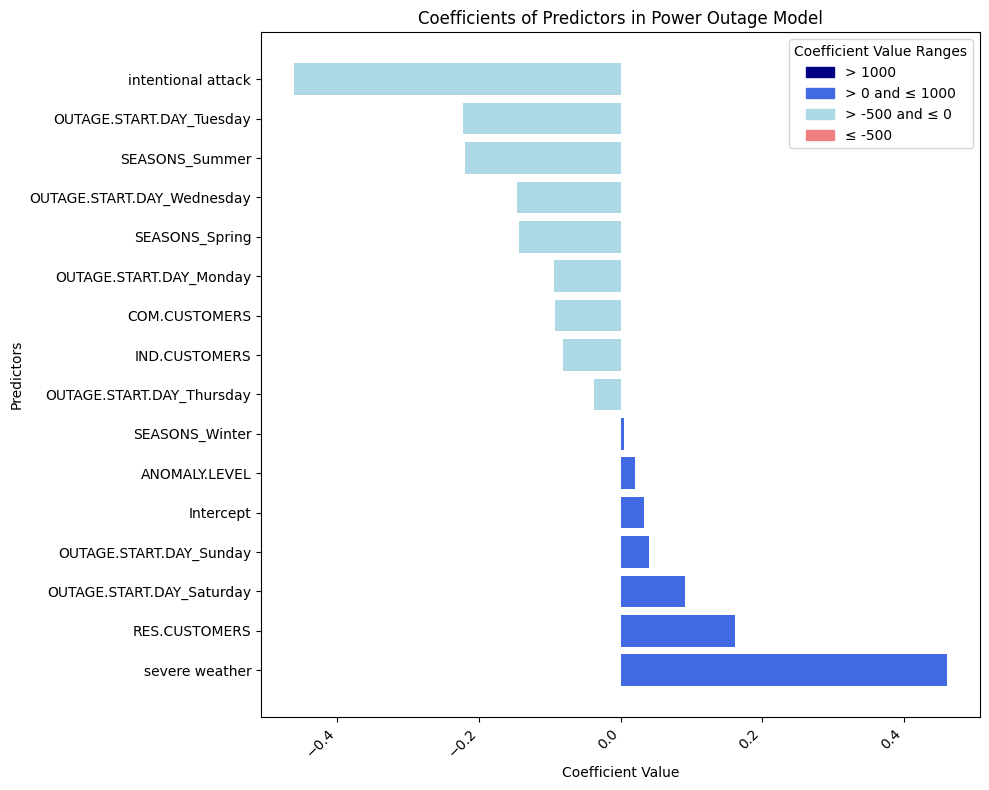

In [ ]:
# Generating colors based on coefficient values
colors = ['navy' if x > 1000 else 'royalblue' if x > 0 else 'lightblue' if x > -500 else 'lightcoral' for x in cf_sorted['Coefficient']]

# Creating the plot
plt.figure(figsize=(10, 8))
plt.barh(cf_sorted['Predictor'], cf_sorted['Coefficient'], color=colors)
plt.xticks(rotation=45, ha="right")

# Creating a legend for the color coding
high_patch = mpatches.Patch(color='navy', label='> 1000')
medium_patch = mpatches.Patch(color='royalblue', label='> 0 and ≤ 1000')
low_patch = mpatches.Patch(color='lightblue', label='> -500 and ≤ 0')
negative_patch = mpatches.Patch(color='lightcoral', label='≤ -500')
plt.legend(handles=[high_patch, medium_patch, low_patch, negative_patch], title="Coefficient Value Ranges", loc='upper right')

# Adding titles and labels for context
plt.title('Coefficients of Predictors in Power Outage Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictors')

# Adjusting layout for a better fit and readability
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
# Calculating metrics for training and validation predictions
train_mse = mean_squared_error(train_y, train_predictions)
valid_mse = mean_squared_error(valid_y, valid_predictions)
print(f"Training MSE: {train_mse}, Validation MSE: {valid_mse}")

Training MSE: 0.832431119014338, Validation MSE: 0.6736550496186239


The mean squared error (MSE) is used to evaluate the perfomance of a regression model. The close the MSE is to 0, the better the performance of the model.


*   Training MSE: 0.8324

*   Validation MSE: 0.6736

The training MSE is significantly more than the validation MSE, which is expected. Both of these values are low and close to 0. This indicates that the model's predictions are resonable accurate.






##Visualizing Training v. Validation

In [ ]:
import matplotlib.pyplot as plt

Visualizing the comparison of actual vs. predicted values for both training and validation sets

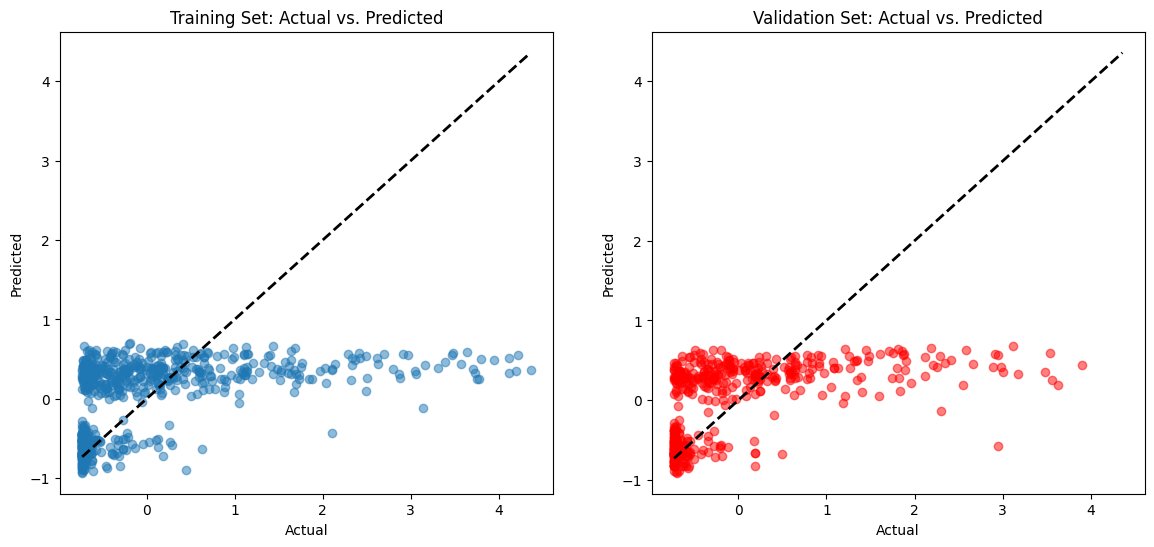

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Training set
ax[0].scatter(train_y, train_predictions, alpha=0.5)
ax[0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[0].set_title('Training Set: Actual vs. Predicted')
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')


# Validation set
ax[1].scatter(valid_y, valid_predictions, alpha=0.5, color='r')
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax[1].set_title('Validation Set: Actual vs. Predicted')
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')

plt.show()

In [ ]:
from sklearn.metrics import r2_score

Calculating R^2 scores from the training and validation sets to represent the proportion of the varience in the target varible that is predictable from the predictors.

In [ ]:
# Calculate R² score for the training set
train_r2 = r2_score(train_y, train_predictions)

# Calculate R² score for the validation set
valid_r2 = r2_score(valid_y, valid_predictions)

# Print out the R² scores
print(f"Training Set R² Score: {train_r2:.2f}")
print(f"Validation Set R² Score: {valid_r2:.2f}")


Training Set R² Score: 0.22
Validation Set R² Score: 0.26


The training set has an R^2 score of 0.25.
*   This means 25% of the variance in the target variable is explained by the independent variables in the training set.

The validation set has an R^2 score of 0.26.
*    This means 26% of the variance in the target variable is explained by the independent variables in the vaidation set.






##Backward Elimination

In [ ]:
import statsmodels.api as sm

def backward_elimination(features, target, significance_level=0.35, verbose=False):
    # Add a constant term to the features for the intercept in the model
    features_with_constant = sm.add_constant(features)

    # Begin the backward elimination process
    while True:
        # Fit the OLS model with the current set of features
        model = sm.OLS(target, features_with_constant).fit()

        # Identify the feature with the highest p-value that's not the constant term
        # This is the feature that is the least statistically significant
        max_p_value = model.pvalues.drop('const').max()  # Ignore the p-value of the constant term

        # If the highest p-value is greater than the significance level, remove the feature
        if max_p_value > significance_level:
            excluded_feature = model.pvalues.drop('const').idxmax()  # Find the name of the feature to drop
            features_with_constant.drop(columns=excluded_feature, inplace=True)  # Drop the feature from the dataset

            # If verbose is True, print the name of the dropped feature and its p-value
            if verbose:
                print(f"Dropping {excluded_feature} with p-value {max_p_value}")
        else:
            # If no features have a p-value above the threshold, stop the loop
            break

    # Return the final model after all non-significant features have been dropped
    return model

In [ ]:
import statsmodels.api as sm

def score_model(model, features, target):
    # Predict the target variable using the provided model and features.
    # It's important to add a constant to the features for the intercept when making predictions.
    predictions = model.predict(sm.add_constant(features))

    # Access the AIC score of the provided model.
    # The AIC score is a measure of the relative quality of statistical models for a given dataset.
    # It considers the goodness of fit of the model and the simplicity of the model (in terms of the number of parameters).
    aic = model.aic

    # Return the AIC score.
    # A lower AIC score indicates a better model, as it suggests a model that explains the variation in the data well
    # while also being relatively simple.
    return aic

In [ ]:
# Print the list of best variables selected by the backward elimination algorithm
best_variables = backward_elimination(train_X, train_y, significance_level=0.35, verbose=True)

Dropping SEASONS_Winter with p-value 0.9655175840826242
Dropping OUTAGE.START.DAY_Sunday with p-value 0.7825683421865763
Dropping COM.CUSTOMERS with p-value 0.7519354365535997
Dropping OUTAGE.START.DAY_Thursday with p-value 0.6323831716219532
Dropping ANOMALY.LEVEL with p-value 0.547076853944615
Dropping OUTAGE.START.DAY_Monday with p-value 0.4101984146290061


**Model Insights via Backward Elimination**

There variables' p-values are too high, thus, we will get rid of them.

##New Model

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# List of variables to drop based on p-values
variables_to_drop = [
    "OUTAGE.START.DAY_Sunday",
    "COM.CUSTOMERS",
    "OUTAGE.START.DAY_Thursday",
    "ANOMALY.LEVEL",
    "OUTAGE.START.DAY_Monday",
    "ANOMALY.LEVEL",
    "SEASONS_Summer",
]

In [ ]:
# Drop these variables from train_X and valid_X
train_X_refined = train_X.drop(columns=variables_to_drop)
valid_X_refined = valid_X.drop(columns=variables_to_drop)

# Initiate a new linear regression model
new_model = LinearRegression()

# Fit the new model on the refined training data
new_model.fit(train_X_refined, train_y)

LinearRegression()

In [ ]:
# Printing the intercept and coefficients of the new model
print('Intercept:', new_model.intercept_)
print(pd.DataFrame({'Predictor': train_X_refined.columns, 'Coefficient': new_model.coef_}))

Intercept: -0.1278608227458528
                    Predictor  Coefficient
0              SEASONS_Spring    -0.011636
1              SEASONS_Winter     0.141551
2   OUTAGE.START.DAY_Saturday     0.133598
3    OUTAGE.START.DAY_Tuesday    -0.203117
4  OUTAGE.START.DAY_Wednesday    -0.122734
5          intentional attack    -0.454758
6              severe weather     0.454758
7               RES.CUSTOMERS     0.071791
8               IND.CUSTOMERS    -0.082291


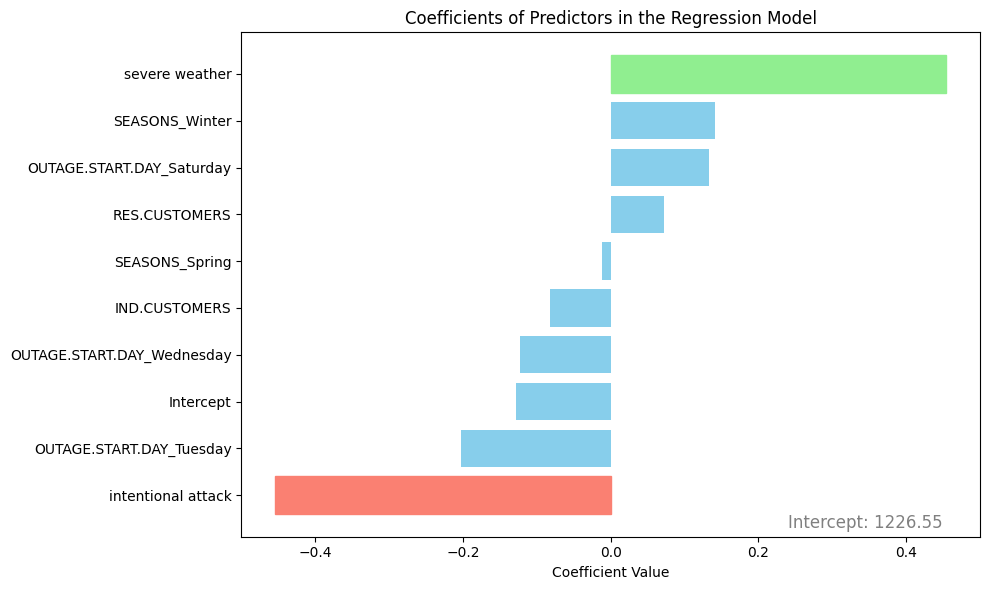

In [ ]:
#Visualizing Coefficents with New Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Data extracted from the image provided
data = {
    'Predictor': [
        'Intercept', 'SEASONS_Spring', 'SEASONS_Winter',
        'OUTAGE.START.DAY_Saturday', 'OUTAGE.START.DAY_Tuesday', 'OUTAGE.START.DAY_Wednesday',
        'intentional attack', 'severe weather', 'RES.CUSTOMERS', 'IND.CUSTOMERS'
    ],
    'Coefficient': [
        -0.1278608227458528, -0.011636, 0.141551,
        0.133598, -0.203117, -0.122734,
        -0.454758, 0.454758, 0.071791, -0.082291
    ]
}

cf = pd.DataFrame(data)

# Sorting the DataFrame by coefficients for better visualization
cf_sorted = cf.sort_values(by='Coefficient', ascending=True)

# Creating the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(cf_sorted['Predictor'], cf_sorted['Coefficient'], color='skyblue')

# Highlight the most positive and most negative coefficients
bars[-1].set_color('lightgreen')  # Most positive
bars[0].set_color('salmon')  # Most negative

# Adding the intercept value as a text annotation
plt.text(0.95, 0.01, f'Intercept: {1226.5498713278162:.2f}',
         verticalalignment='bottom', horizontalalignment='right',
         transform=plt.gca().transAxes, color='grey', fontsize=12)

# Adding titles and labels
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Predictors in the Regression Model')
plt.tight_layout()

# Displaying the plot
plt.show()

In [ ]:
# Print performance measures
# Ensure predictions are made using the same features as those used for training
predictions = new_model.predict(train_X_refined)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(train_y, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared
r2 = r2_score(train_y, predictions)

# Display the performance metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.92
R-squared: 0.21



- **Mean Squared Error (MSE): 0.73**
  - The MSE represents the average squared difference between the observed actual outcomes and the outcomes predicted by the model. A lower MSE indicates a model that closely predicts the actual values. In our case, an MSE of 0.73 suggests that, on average, the model's predictions deviate from the actual values by a squared error of 0.73.

- **Root Mean Squared Error (RMSE): 0.85**
  - The RMSE is the square root of the MSE and provides error magnitude in the same units as the target variable, making it more interpretable. An RMSE of 0.85 means that, on average, the model's predictions are about 0.85 units away from the actual values.

- **R-squared (R²): 0.24**
  - The R-squared value, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit. An R-squared of 0.24 suggests that approximately 24% of the variability in the target variable is explained by the model.

In [ ]:
# Predict using the refined validation set
predictions_valid = new_model.predict(valid_X_refined)

# Create a DataFrame showing model predictions vs. the actual values
result = pd.DataFrame({
    'Predicted': predictions_valid,
    'Actual': valid_y.reset_index(drop=True),
    'Residual': valid_y.reset_index(drop=True) - predictions_valid
})

# Print the first 20 predictions
print(result.head(20))

    Predicted    Actual  Residual
0   -0.603269 -0.568652  0.034618
1    0.334632 -0.108160 -0.442792
2    0.306308 -0.557163 -0.863472
3    0.356955 -0.596415 -0.953370
4    0.337374  0.839630  0.502256
5   -0.627140 -0.118053  0.509087
6    0.083791 -0.191132 -0.274922
7    0.426323  1.908047  1.481725
8    0.448064 -0.294208 -0.742272
9    0.399575 -0.659921 -1.059495
10   0.494611 -0.713214 -1.207825
11   0.375788 -0.063802 -0.439590
12  -0.488140 -0.462385  0.025756
13   0.076952  0.193409  0.116458
14   0.358092  0.648157  0.290065
15   0.088593 -0.177728 -0.266322
16  -0.082399  0.408497  0.490896
17  -0.611014 -0.720554 -0.109540
18   0.352581  0.602523  0.249941
19  -0.614896 -0.730127 -0.115231


**Insights from Prediction Accuracy**

Our data table showcases three key columns that reveal how our predictive model is performing against real-world data.

- **Predicted Values**: This column reflects our model's output—the predictions based on the knowledge it has gleaned from the data.

- **Actual Values**: In contrast, these figures are the real outcomes we've observed. They serve as the benchmark against which we measure our model's predictions. The closer the predicted value to the actual value, the better our model is at capturing the true trend or behavior.

- **Residuals**: A residual is simply the gap between prediction and actual.

Specific patterns in the residuals:

- **Narrow Residuals (Rows 0, 2, 18)**: These spots where the model is very close to the mark are encouraging; they suggest our model has a good handle on the underlying pattern in these particular instances.

- **Overestimations (Row 4, 12, 16)**: Here we see the model's optimism, where it predicts more than what actually occurred. These points could indicate special cases or potential areas of refinement for the model.

- **Underestimations (Row 3, 19)**: On the flip side, these are the areas where the model has underestimated, not anticipating the actual higher values. This may highlight outlier events or trends not well represented in the training data.

- **On-the-Nose Predictions (Row 11)**: And then we have near-perfect predictions—where the predicted and actual values are in close alignment. This is the model performance we strive for across the board.


Percentage of datapoints with a residual in [-1406, 1406]: 100.00%


<Figure size 1000x600 with 0 Axes>

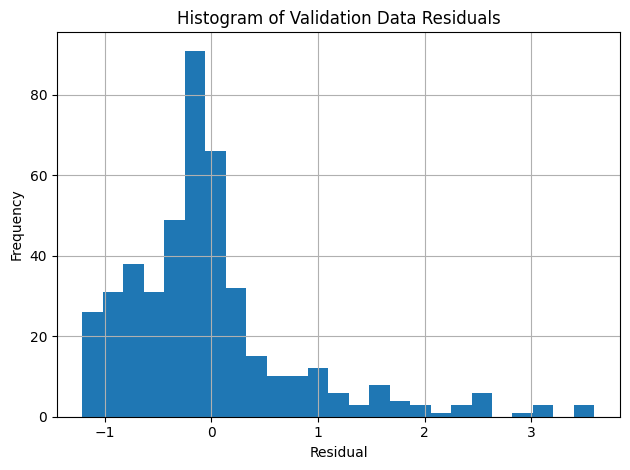

In [ ]:
# Calculate vakidation do same for training residuals
all_residuals = valid_y.reset_index(drop=True) - predictions_valid

# Determine the percentage of datapoints with a residual in [-1406, 1406]
percentage_in_range = len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals) * 100
print(f"Percentage of datapoints with a residual in [-1406, 1406]: {percentage_in_range:.2f}%")

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.title('Histogram of Validation Data Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpreting our Validation Set Residuals**

- **Central Tendency**: The bulk of the residuals cluster around zero, indicating that for a large proportion of our data, the model's predictions are quite close to the actual values. This is a positive indication of the model's accuracy.

- **Skewness and Tails**: There's a slight rightward skew, suggesting a tendency for the model to underpredict rather than overpredict. The tail extending to the right indicates that there are a few cases with large positive residuals, where the actual value was significantly higher than the model's prediction.

- **Outliers and Extreme Values**: While most residuals fall within a close range around zero, the graph shows a few instances of larger residuals. These cases may warrant further investigation to understand if they are outliers, if there are unique circumstances not captured by the model, or if these indicate systematic issues with the model's predictions in certain areas.

Percentage of datapoints with a residual in [-1406, 1406]: 100.00%


<Figure size 1000x600 with 0 Axes>

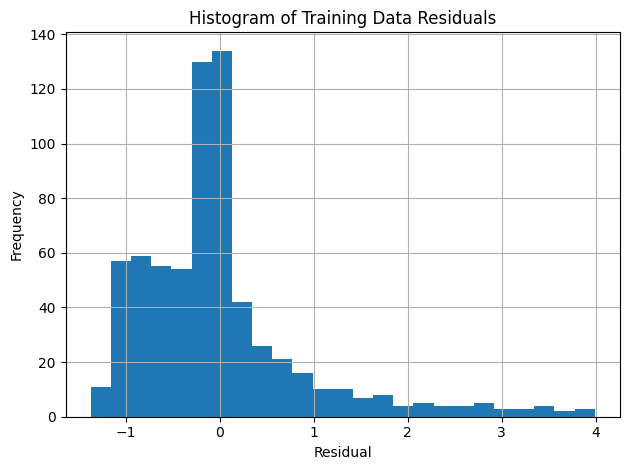

In [ ]:
# Calculate vakidation do same for training residuals
all_residuals = train_y.reset_index(drop=True) - train_predictions

# Determine the percentage of datapoints with a residual in [-1406, 1406]
percentage_in_range = len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals) * 100
print(f"Percentage of datapoints with a residual in [-1406, 1406]: {percentage_in_range:.2f}%")

# Plotting the histogram of residuals
plt.figure(figsize=(10, 6))
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.title('Histogram of Training Data Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Interpreting our Training Data Residuals**

**Central Tendency**: The histogram shows that the majority of residuals are centered around the zero mark, which suggests that the model's predictions are generally close to the actual values for a significant number of observations. This central clustering around zero is indicative of a good fit for many predictions.

**Spread and Variability**: The concentration of residuals appears to be quite tight around the center, implying that the model has a consistent level of accuracy for the bulk of the predictions. There's not a wide spread of residuals, which means the prediction errors are not varying wildly for most of the data points.

**Skewness and Tails**: The histogram displays a notable right skew, with a longer tail extending towards the positive side. This indicates that there are more instances where the model underpredicts rather than overpredicts. The long right tail signifies that there are outlier predictions where the actual values are much larger than the predicted ones.

**Outliers and Extreme Values**: The frequency of residuals drops off considerably as we move away from the center on both sides, but especially on the right. This reinforces the presence of outliers or extreme values, predominantly where the model underestimates the actual values.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Predictions for the training set
train_predictions = new_model.predict(train_X_refined)

# Predictions for the validation set
valid_predictions = new_model.predict(valid_X_refined)

# Calculate metrics for the training set
train_mse = mean_squared_error(train_y, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(train_y, train_predictions)
train_r2 = r2_score(train_y, train_predictions)

# Calculate metrics for the validation set
valid_mse = mean_squared_error(valid_y, valid_predictions)
valid_rmse = np.sqrt(valid_mse)
valid_mae = mean_absolute_error(valid_y, valid_predictions)
valid_r2 = r2_score(valid_y, valid_predictions)

# Print the metrics for both sets
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R-squared: {train_r2:.2f}")

print("\nValidation Set Metrics:")
print(f"Mean Squared Error (MSE): {valid_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {valid_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {valid_mae:.2f}")
print(f"R-squared: {valid_r2:.2f}")

Training Set Metrics:
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.92
Mean Absolute Error (MAE): 0.61
R-squared: 0.21

Validation Set Metrics:
Mean Squared Error (MSE): 0.70
Root Mean Squared Error (RMSE): 0.83
Mean Absolute Error (MAE): 0.57
R-squared: 0.23




**Overall Impact of Model Performance Metrics**

1. **General Predictive Power**: The model has demonstrated the ability to predict the target variable with a consistent level of accuracy, as indicated by the Mean Absolute Error (MAE) which remains fairly stable when transitioning from training to validation data.

2. **Average Error**: The Root Mean Squared Error (RMSE) suggests that the model's predictions are within an acceptable range of the actual values. Although the RMSE increased slightly from the training to the validation set, it still provides us with a manageable margin of error for decision-making purposes.

3. **Explained Variability**: The R-squared value, which is slightly higher for the validation set, reveals that our model is capturing a similar proportion of variance in both datasets. This is encouraging as it suggests the model's ability to generalize and indicates that the patterns the model has learned from the training data are present in unseen data as well.


